MP 12/2017

In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

np.set_printoptions(precision=6, linewidth=110)

In [2]:
# https://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/UsingTex

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

## Read timing data

The npy files contain the fields `number, repeat, best, tc, retval_best` for each approximant.

In [3]:
# These were the settings in timings.py

f_mins = np.arange(10.0, 100.0, 5)
Mtot = 2*1.4

q = 1.0/1.01
chi1 = 0.1
chi2 = 0.1
lambda1 = 1286.0
lambda2 = 1286.0

# Fixed parameter space points for tidal and non-tidal test cases
x = np.array([q, chi1, chi2, lambda1, lambda2])
xnT = np.array([q, chi1, chi2, 0, 0])

The tests were done for linear spline order: `SEOBNRv4TSurrogate_LINEAR`. This code was also used for the PE runs. (That means that `tim_SEOBNRv4T_surrogate_cubic.npy` is an old file and should be ignored.)

In [39]:
ls *.npy

tim_IMRPhenomD_NRTidal.npy          tim_SEOBNRv4_ROM.npy
tim_SEOBNRv4T.npy                   tim_SEOBNRv4_ROM_NRTidal.npy
tim_SEOBNRv4T_surrogate_cubic.npy   tim_TF2.npy
tim_SEOBNRv4T_surrogate_linear.npy  tim_sur_additional.npy


In [53]:
dfs_SEOBNRv4T = np.load('tim_SEOBNRv4T.npy').T[-1]
dfs_SEOBNRv4T_surrogate_linear = np.load('tim_SEOBNRv4T_surrogate_linear.npy').T[-1]
#dfs_SEOBNRv4T_surrogate_linear = np.load('tim_sur_additional.npy').T[-1]
#dfs_SEOBNRv4T_surrogate_cubic = np.load('tim_SEOBNRv4T_surrogate_cubic.npy').T[-1]

In [54]:
t_SEOBNRv4T = np.load('tim_SEOBNRv4T.npy').T[2]
t_SEOBNRv4T_surrogate_linear = np.load('tim_SEOBNRv4T_surrogate_linear.npy').T[2]
#t_SEOBNRv4T_surrogate_linear = np.load('tim_sur_additional.npy').T[2]
#t_SEOBNRv4T_surrogate_cubic = np.load('tim_SEOBNRv4T_surrogate_cubic.npy').T[2]
t_TF2 = np.load('tim_TF2.npy').T[2]
t_SEOBNRv4_ROM = np.load('tim_SEOBNRv4_ROM.npy').T[2]
t_SEOBNRv4_ROM_NRTidal = np.load('tim_SEOBNRv4_ROM_NRTidal.npy').T[2]
t_IMRPhenomD_NRTidal = np.load('tim_IMRPhenomD_NRTidal.npy').T[2]

In [70]:
d = {'SEOBNRv4T': t_SEOBNRv4T,
     'SEOBNRv4T\_surrogate': t_SEOBNRv4T_surrogate_linear,
     'TaylorF2': t_TF2,
     'SEOBNRv4\_ROM': t_SEOBNRv4_ROM,
     'SEOBNRv4\_ROM\_NRTidal': t_SEOBNRv4_ROM_NRTidal,
     'IMRPhenomD\_NRTidal': t_IMRPhenomD_NRTidal
    }
df = pd.DataFrame(d, index=f_mins)

In [71]:
df

,IMRPhenomD\_NRTidal,SEOBNRv4T,SEOBNRv4T\_surrogate,SEOBNRv4\_ROM,SEOBNRv4\_ROM\_NRTidal,TaylorF2
10.0,2.196231,6518.420367,1.092410,1.126362,2.148186,0.804701
15.0,0.556158,1331.097847,0.285138,0.285159,0.529770,0.201689
20.0,0.266891,505.598411,0.138034,0.135411,0.258110,0.091789
25.0,0.134314,259.323590,0.072441,0.069087,0.129890,0.045667
30.0,0.134043,160.170713,0.071582,0.068977,0.129766,0.045623
35.0,0.067079,107.662755,0.038145,0.035543,0.065875,0.022574
40.0,0.033585,79.106366,0.022748,0.018530,0.033607,0.011303
45.0,0.033484,61.826643,0.022775,0.018385,0.033603,0.011283
50.0,0.033440,48.506121,0.022684,0.018353,0.033518,0.011339
55.0,0.016847,40.268384,0.015061,0.010089,0.017604,0.005752


3*10 evaluations of SEOBNRv4T from 10Hz: 

    6518.420367 / 3600 * 30 / 24 ~ 2.26 days [vulcan]

## Plot speedup and inverse frequency spacing

In [72]:
speedup_linear = df['SEOBNRv4T']/df['SEOBNRv4T\_surrogate']

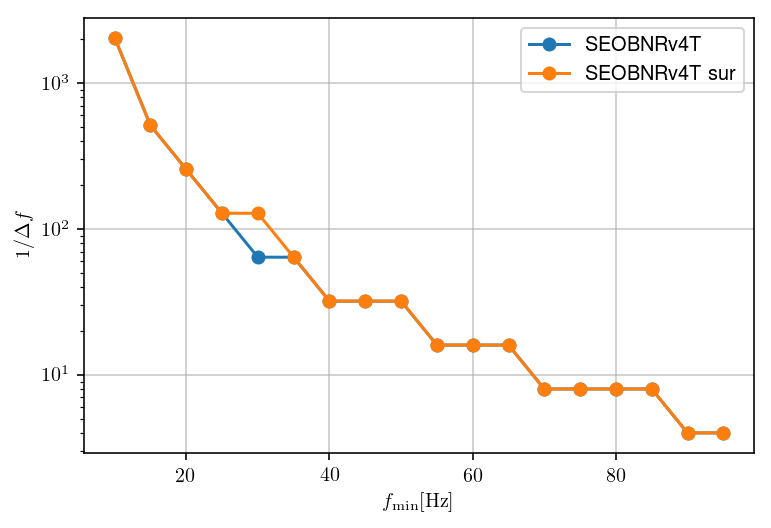

In [73]:
plt.semilogy(f_mins, 1./dfs_SEOBNRv4T, 'o-', label='SEOBNRv4T')
plt.semilogy(f_mins, 1./dfs_SEOBNRv4T_surrogate_linear, 'o-', label='SEOBNRv4T sur');
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'$1 / \Delta f$')
plt.grid(alpha=0.7)
plt.legend()
plt.savefig('SEOBNRv4T_surrogate_inv_dfs.pdf')
plt.savefig('SEOBNRv4T_surrogate_inv_dfs.png')

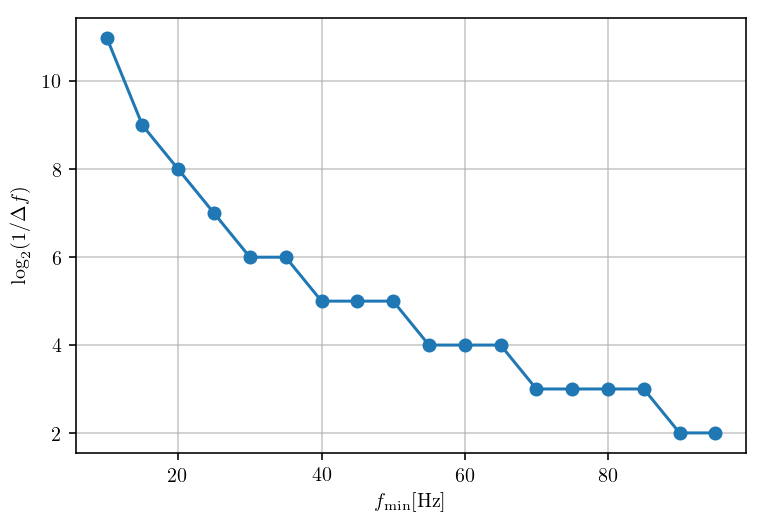

In [74]:
plt.plot(f_mins, np.log2(1./dfs_SEOBNRv4T), 'o-')
#plt.plot(f_mins, np.log2(1./dfs_SEOBNRv4T_surrogate_linear), 'o-');
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'$\log_2 (1 / \Delta f)$')
plt.grid(alpha=0.7)
plt.savefig('SEOBNRv4T_surrogate_log2_inv_dfs.pdf')
plt.savefig('SEOBNRv4T_surrogate_log2_inv_dfs.png')

The speedup curve is not very smooth because $\Delta f$ can jump

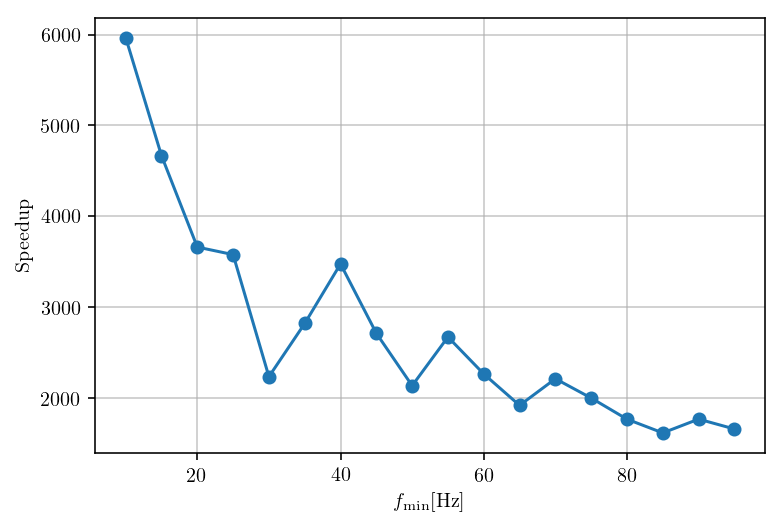

In [75]:
plt.plot(f_mins, speedup_linear.values, 'o-')
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'$\mathrm{Speedup}$')
plt.grid(alpha=0.7)
plt.savefig('SEOBNRv4T_surrogate_speedup.pdf')
plt.savefig('SEOBNRv4T_surrogate_speedup.png')

Only plot the points where deltaF changes

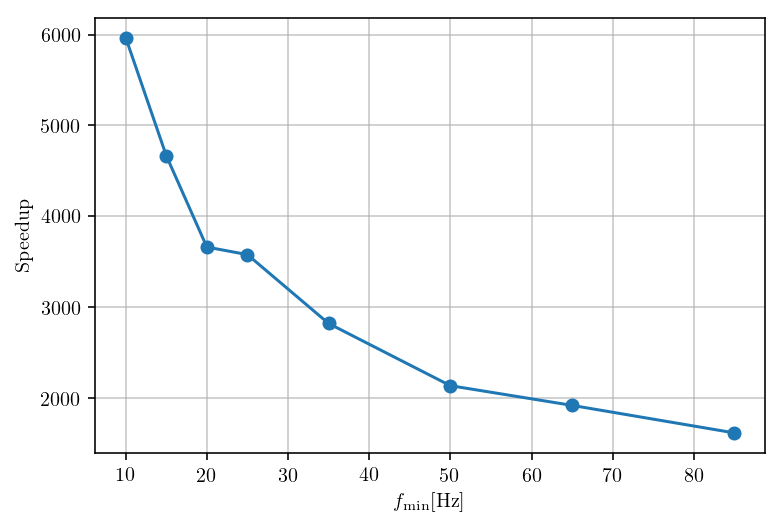

In [117]:
idx = np.where(np.diff(np.log2(1./dfs_SEOBNRv4T)) < 0)
#idx = np.array([ 0,  1,  2,  5,  8, 11, 15]) # also drop point 3
idx = np.array([ 0,  1,  2,  3,  5,  8, 11, 15])
plt.plot(f_mins[idx], speedup_linear.values[idx], 'o-')
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'$\mathrm{Speedup}$')
plt.grid(alpha=0.7)
plt.savefig('SEOBNRv4T_surrogate_speedup_deltaF_monontonic.pdf')
plt.savefig('SEOBNRv4T_surrogate_speedup_deltaF_monontonic.png')

## Plot evaluation speeds

In [94]:
idx = np.where(np.diff(np.log2(1./dfs_SEOBNRv4T_surrogate_linear)) < 0)[0]
idx = np.array([ 0,  1,  2,  3,  5,  8, 11, 15])
df_monotonic = df.take(idx)

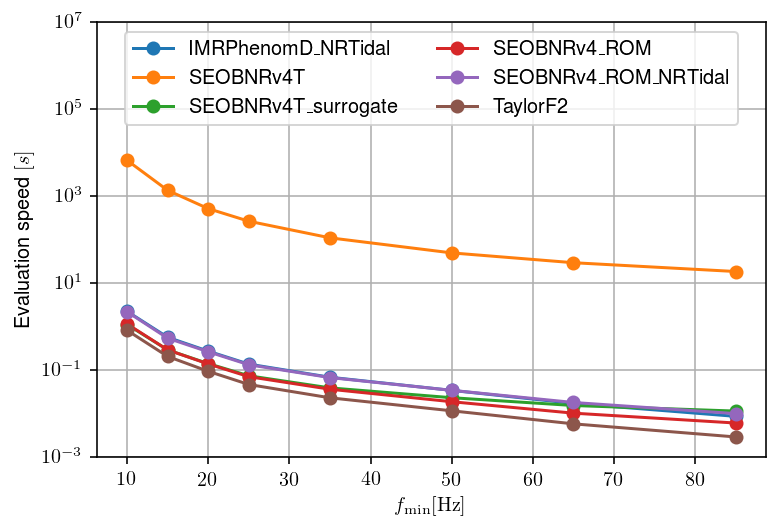

In [105]:
ax = df_monotonic.plot(style='o-', legend=True, logy=True, grid=True)
ax.legend(df_monotonic.columns, ncol=2, loc=9)
plt.ylim([1e-3, 1e7])
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'Evaluation speed $[s]$');
plt.savefig('Models_timings_all.pdf')
plt.savefig('Models_timings_all.png')

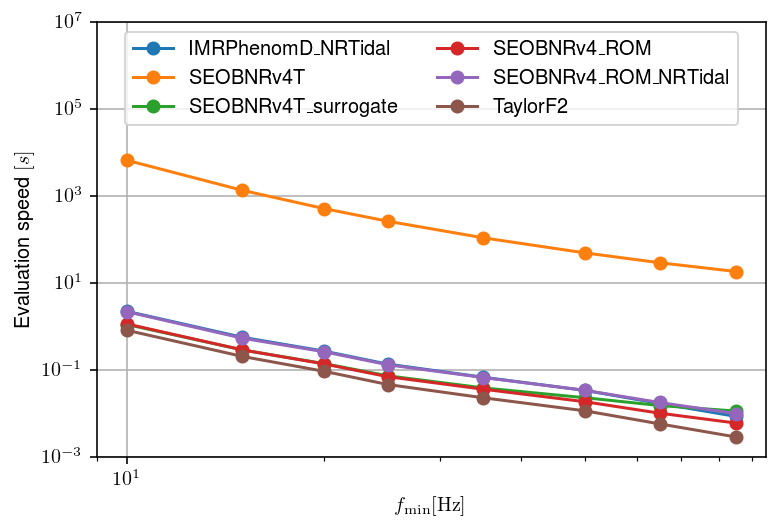

In [106]:
ax = df_monotonic.plot(style='o-', legend=True, loglog=True, grid=True)
ax.legend(df_monotonic.columns, ncol=2, loc=9)
plt.ylim([1e-3, 1e7])
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'Evaluation speed $[s]$');
plt.savefig('Models_timings_all_loglog.pdf')
plt.savefig('Models_timings_all_loglog.png')

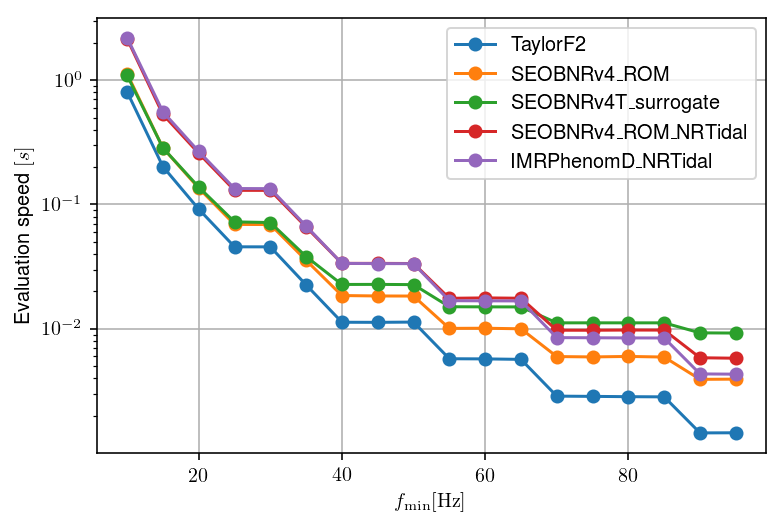

In [79]:
df.plot(y=['TaylorF2', 
           'SEOBNRv4\_ROM', 'SEOBNRv4T\_surrogate',
           'SEOBNRv4\_ROM\_NRTidal', 'IMRPhenomD\_NRTidal'],
        style='o-', legend=True, logy=True, grid=True)
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'Evaluation speed $[s]$');
plt.savefig('Models_timings_FD.pdf')
plt.savefig('Models_timings_FD.png')

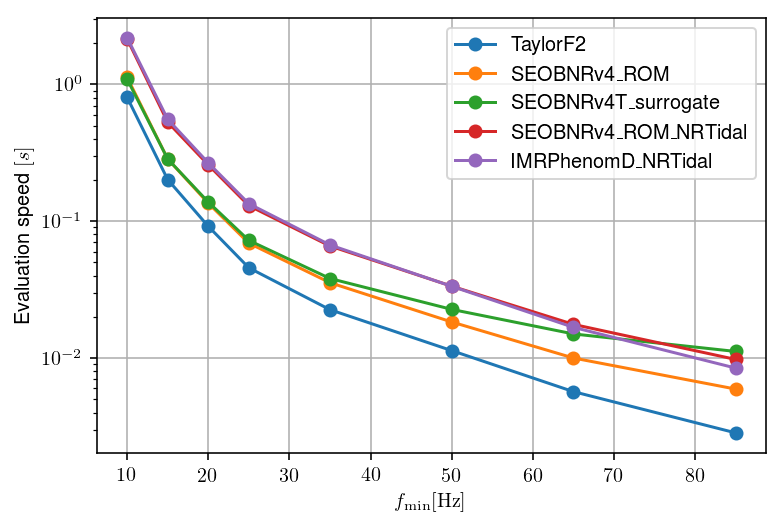

In [92]:
df_monotonic.plot(y=['TaylorF2', 'SEOBNRv4\_ROM', 'SEOBNRv4T\_surrogate',
                     'SEOBNRv4\_ROM\_NRTidal', 'IMRPhenomD\_NRTidal'],
                  style='o-', legend=True, logy=True, grid=True)
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'Evaluation speed $[s]$');
plt.savefig('Models_timings_FD_monotonic.pdf')
plt.savefig('Models_timings_FD_monotonic.png')

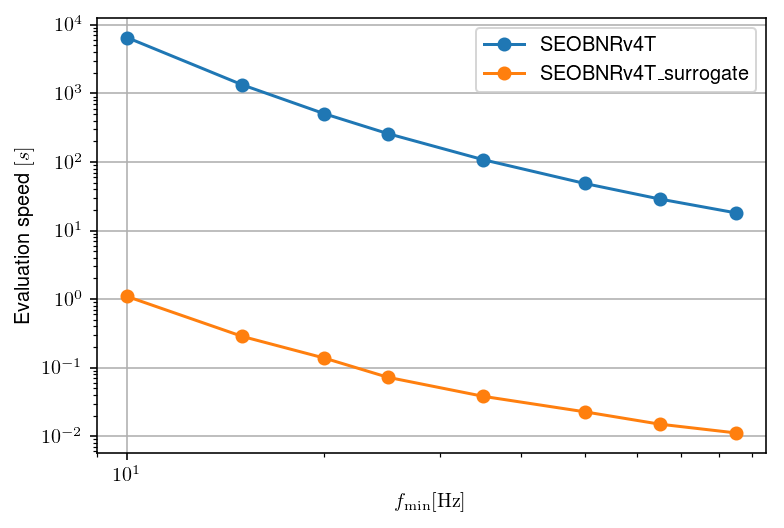

In [107]:
df_monotonic.plot(y=['SEOBNRv4T', 'SEOBNRv4T\_surrogate'], style='o-', legend=True, loglog=True, grid=True)
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'Evaluation speed $[s]$');

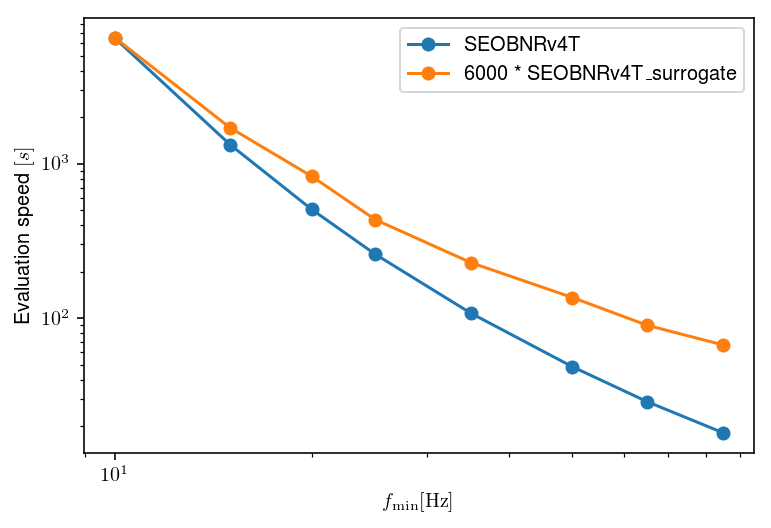

In [108]:
plt.loglog(df_monotonic['SEOBNRv4T'], 'o-', label='SEOBNRv4T')
plt.loglog(6000*df_monotonic['SEOBNRv4T\_surrogate'], 'o-', label='6000 * SEOBNRv4T\_surrogate')
plt.legend()
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'Evaluation speed $[s]$');

In [32]:
import statsmodels.api as sm

def fit_line(x, y):
    """Return slope, intercept of best fit line."""
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0] # could also return stderr in each via fit.bse

/usr/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [112]:
x, y = np.log10(df['SEOBNRv4T'].index), np.log10(df['SEOBNRv4T'].values)
#a,b = fit_line(x, y) # a linear fit is not sufficient
a,b,c = np.polyfit(x, y, 2) # quadratic is quite accurate
time_fit = lambda f: 10.0**(a*np.log10(f)**2 + b*np.log10(f) + c)
a,b,c

(1.3277350747903114, -6.6128152672133345, 9.078885007336138)

Fit to final SEOBNRv4T timing data:
$$
\log_{10} \mathrm{time\_SEOBNRv4T} \sim 1.33 \log_{10}(f)^2 - 6.61 \log_{10}(f) + 9.08
$$


The previous fit (1.35 + 1.35 BNS):
$$
\log_{10} \mathrm{time\_SEOBNRv4T} \sim 1.16 \log_{10}(f)^2 - 6.24 \log_{10}(f) + 9.08
$$

In [113]:
x, y = np.log10(df_monotonic['SEOBNRv4T\_surrogate'].index), np.log10(df_monotonic['SEOBNRv4T\_surrogate'].values)
#a,b = fit_line(x, y) # a linear fit is not sufficient
a2,b2,c2 = np.polyfit(x, y, 2) # quadratic is quite accurate
time_fit2 = lambda f: 10.0**(a2*np.log10(f)**2 + b2*np.log10(f) + c2)
a2,b2,c2

(1.409482302556163, -6.243852223395426, 4.862804260023545)

Fit to final SEOBNRv4T_surrogate timing data:
$$
\log_{10} \mathrm{time\_SEOBNRv4T\_surrogate} \sim 1.41 \log_{10}(f)^2 - 6.24 \log_{10}(f) + 4.86
$$


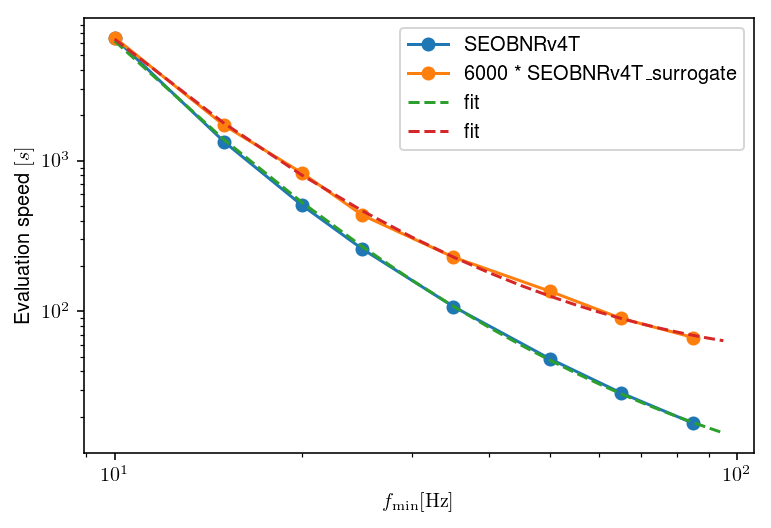

In [115]:
plt.loglog(df_monotonic['SEOBNRv4T'], 'o-', label='SEOBNRv4T')
plt.loglog(6000*df_monotonic['SEOBNRv4T\_surrogate'], 'o-', label='6000 * SEOBNRv4T\_surrogate')
plt.loglog(f_mins, time_fit(f_mins), '--', label='fit')
plt.loglog(f_mins, 6000*time_fit2(f_mins), '--', label='fit')
plt.legend()
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'Evaluation speed $[s]$');

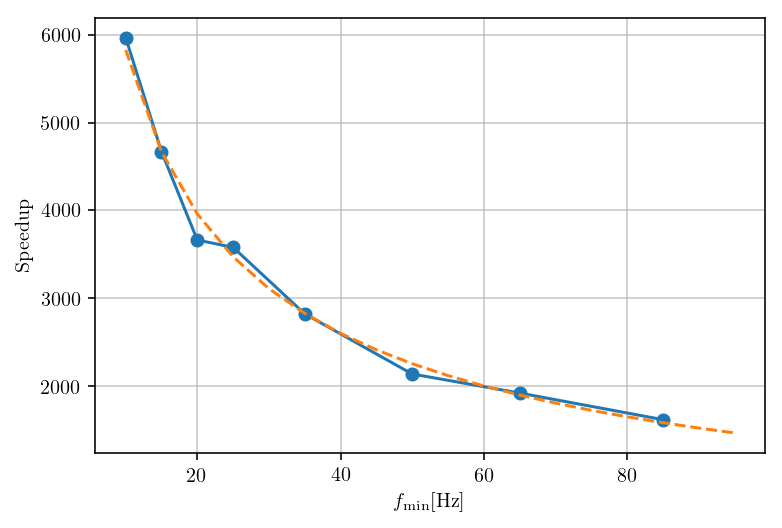

In [118]:
idx = np.where(np.diff(np.log2(1./dfs_SEOBNRv4T)) < 0)
#idx = np.array([ 0,  1,  2,  5,  8, 11, 15]) # also drop point 3
idx = np.array([ 0,  1,  2,  3,  5,  8, 11, 15])
plt.plot(f_mins[idx], speedup_linear.values[idx], 'o-')

plt.plot(f_mins, time_fit(f_mins)/time_fit2(f_mins), '--', label='fit')

plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'$\mathrm{Speedup}$')
plt.grid(alpha=0.7)
plt.savefig('SEOBNRv4T_surrogate_speedup_deltaF_monontonic_check.pdf')
plt.savefig('SEOBNRv4T_surrogate_speedup_deltaF_monontonic_check.png')

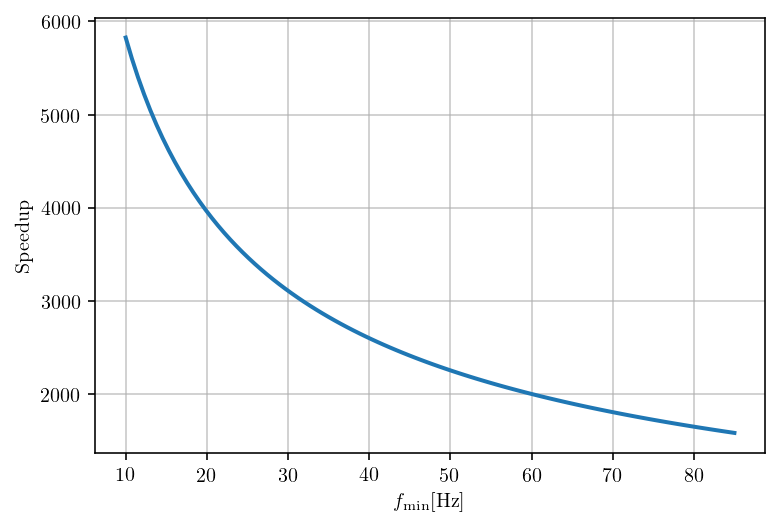

In [128]:
f = np.linspace(10, 85, 100)
plt.plot(f, time_fit(f)/time_fit2(f), lw=2)

plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'$\mathrm{Speedup}$')
#plt.xlim([10, 100])
plt.grid(alpha=0.7)
plt.savefig('SEOBNRv4T_surrogate_speedup_deltaF_monontonic_fit.pdf')
plt.savefig('SEOBNRv4T_surrogate_speedup_deltaF_monontonic_fit.png')